In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    classification_report,
    make_scorer,
    average_precision_score,
    precision_recall_curve
)

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
alzheimer = df.drop(columns="DoctorInCharge")
alzheimer

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [3]:
models = {
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier())
}

In [4]:
var = [c for c in alzheimer.columns if c not in ["Diagnosis", "PatientID"]]

target_variable = "Diagnosis"

X = alzheimer[var]
y = alzheimer[target_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


SVM metrics:
Accuracy:   0.833
Precision:  0.819
Recall:     0.680
F1-score:   0.743


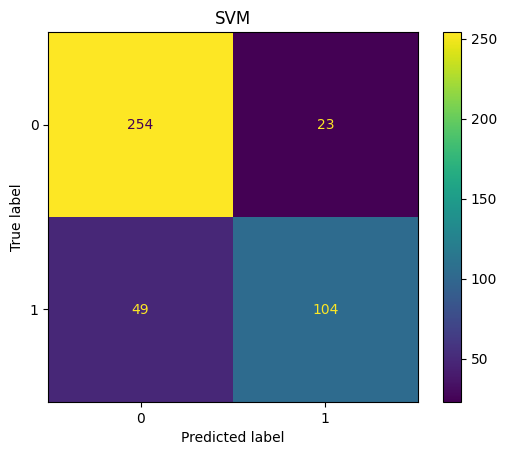


Random Forest metrics:
Accuracy:   0.916
Precision:  0.953
Recall:     0.804
F1-score:   0.872


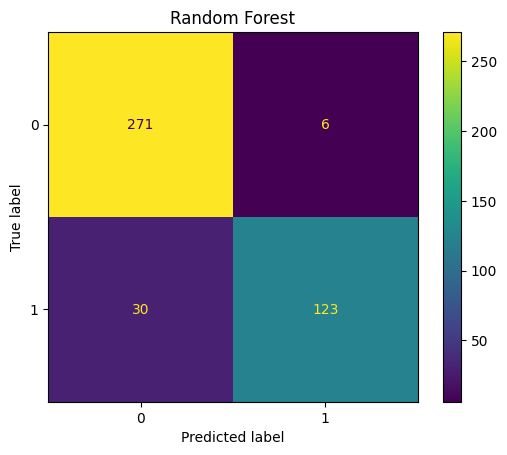


Gradient Boosting metrics:
Accuracy:   0.942
Precision:  0.957
Recall:     0.876
F1-score:   0.915


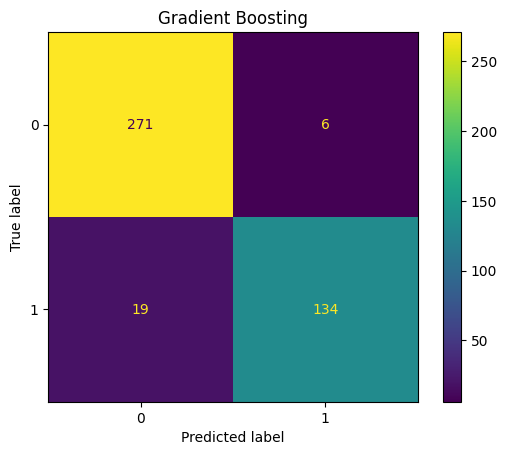


Logistic Regression metrics:
Accuracy:   0.814
Precision:  0.763
Recall:     0.693
F1-score:   0.726


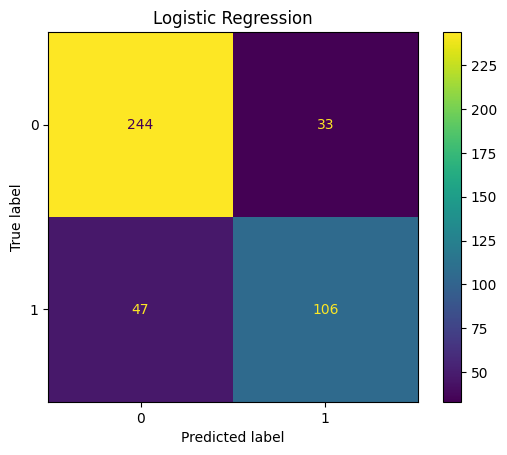


K-Nearest Neighbors metrics:
Accuracy:   0.709
Precision:  0.652
Recall:     0.392
F1-score:   0.490


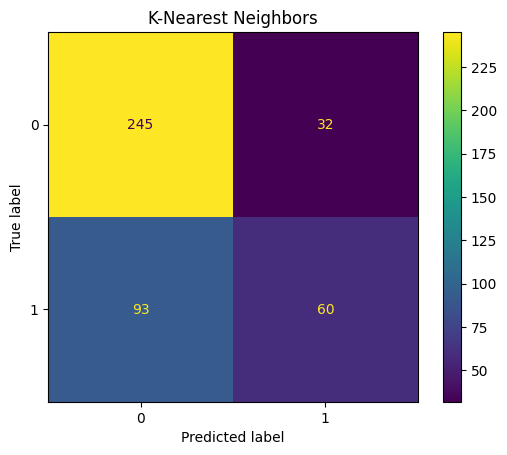

In [5]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}
    
    print(f"\n{name} metrics:")
    print(f"Accuracy:   {acc:.3f}")
    print(f"Precision:  {prec:.3f}")
    print(f"Recall:     {rec:.3f}")
    print(f"F1-score:   {f1:.3f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()

In [6]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = ["accuracy", "precision", "recall", "f1"]

cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    cv_results[name] = {
        "Accuracy": np.mean(scores["test_accuracy"]),
        "Precision": np.mean(scores["test_precision"]),
        "Recall": np.mean(scores["test_recall"]),
        "F1-score": np.mean(scores["test_f1"])
    }

for model_name, metrics in cv_results.items():
    print(f"\n{model_name} Cross-Validation Metrics:")
    print(f"Accuracy:  {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall:    {metrics['Recall']:.3f}")
    print(f"F1-score:  {metrics['F1-score']:.3f}")


SVM Cross-Validation Metrics:
Accuracy:  0.842
Precision: 0.820
Recall:    0.712
F1-score:  0.761

Random Forest Cross-Validation Metrics:
Accuracy:  0.933
Precision: 0.952
Recall:    0.853
F1-score:  0.899

Gradient Boosting Cross-Validation Metrics:
Accuracy:  0.945
Precision: 0.926
Recall:    0.918
F1-score:  0.922

Logistic Regression Cross-Validation Metrics:
Accuracy:  0.839
Precision: 0.800
Recall:    0.734
F1-score:  0.764

K-Nearest Neighbors Cross-Validation Metrics:
Accuracy:  0.718
Precision: 0.647
Recall:    0.442
F1-score:  0.524


SVM                  F1: 0.757 ± 0.018
Random Forest        F1: 0.908 ± 0.013
Gradient Boosting    F1: 0.922 ± 0.017
Logistic Regression  F1: 0.755 ± 0.021
K-Nearest Neighbors  F1: 0.539 ± 0.033


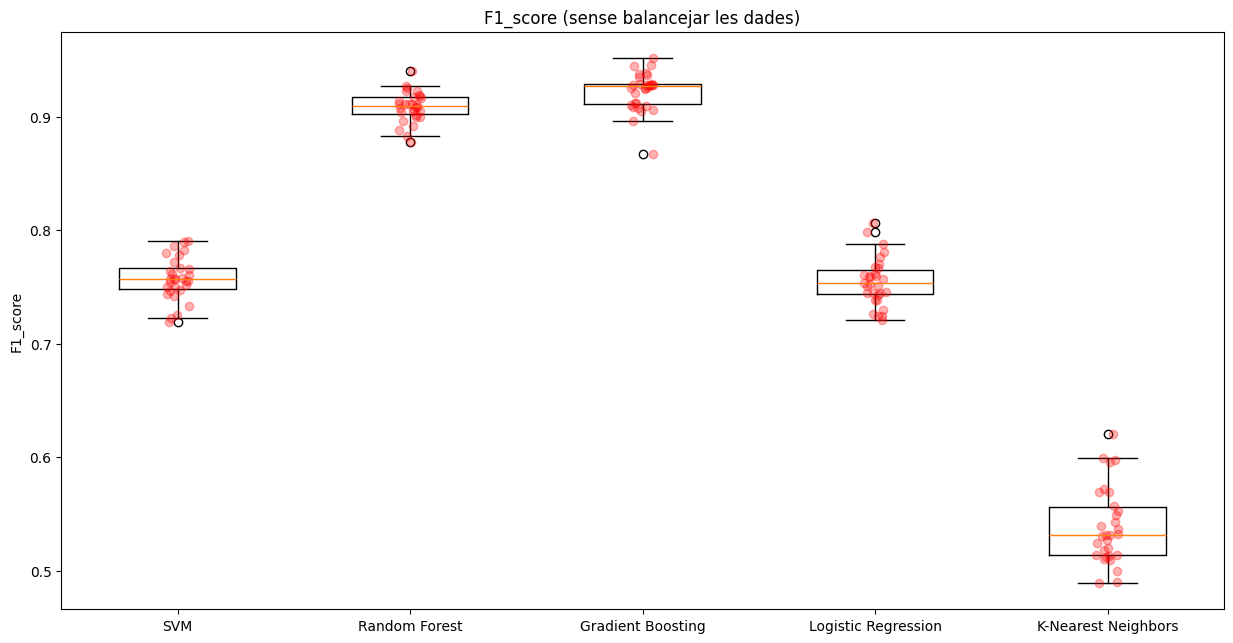

In [ ]:
testsize = 0.2
n_proves = 30
f1_r=np.zeros((n_proves,len(models)))
model_names = list(models.keys())

for i in range(n_proves):
    for j, name in enumerate(model_names):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

        model = models[name]
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)

        f1_r[i][j] = f1_score(y_test, y_pred)


plt.figure(figsize=(15,7.5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.boxplot(f1_r)
for i in range(len(models)):
    xderiv = (i+1)*np.ones(f1_r[:,i].shape)+(np.random.rand(n_proves,)-0.5)*0.1
    plt.plot(xderiv,f1_r[:,i],'ro',alpha=0.3)


plt.xticks(range(1, len(model_names) + 1), model_names)
plt.ylabel('F1_score', fontsize=16 )
plt.title('F1_score (sense balancejar les dades)', fontsize=18)


mean_f1 = f1_r.mean(axis=0)
std_f1 = f1_r.std(axis=0)

for name, mean, std in zip(model_names, mean_f1, std_f1):
    print(f"{name:<20} F1: {mean:.3f} ± {std:.3f}")

In [24]:
models = {
    "Logistic Regression": Pipeline([
        ("scale", StandardScaler()),
        ("clf", LogisticRegression())
    ]),
    
    "KNN": Pipeline([
        ("scale", StandardScaler()),
        ("clf", KNeighborsClassifier())
    ]),
    
    "SVM": Pipeline([
        ("scale", StandardScaler()),
        ("clf", SVC())
    ]),
    
    "Random Forest": Pipeline([
        ("clf", RandomForestClassifier())
    ]),
    
    "GradientBoosting": Pipeline([
        ("clf", GradientBoostingClassifier())
    ])
}

In [25]:
param_grids = { #canviar/afegir hiperparàmetres??
   "Logistic Regression": {
        "clf__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "clf__solver": ["lbfgs", "liblinear"],
        "clf__max_iter": [300, 500, 1000]
    },
    "KNN": {
        "clf__n_neighbors": [1, 3, 5, 7, 9, 15, 25],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]   # Manhattan / Euclidean
    },

    "SVM": {
        "clf__C": [0.01, 0.1, 1, 10, 100],
        "clf__kernel": ["linear", "rbf"],
        "clf__gamma": ["scale", "auto"]   # només s’usa amb RBF
    },

    "Random Forest": {
        "clf__n_estimators": [100, 200, 400, 700],
        "clf__max_depth": [None, 5, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4],
        "clf__max_features": ["sqrt", "log2"]
    },
    
    "GradientBoosting": {
        "clf__n_estimators": [100, 300, 500],
        "clf__learning_rate": [0.01, 0.05, 0.1],
        "clf__max_depth": [2, 3, 5],
        "clf__subsample": [0.6, 0.8, 1.0]
    }

}


In [26]:
f1_scorer = make_scorer(f1_score)

**Grid Search**

Fem una primera cerca d’hiperparàmetres amb GridSearchCV. Aquesta funció prova totes les combinacions d’hiperparàmetres establertes al diccionari param\_grid i, per tant, és un procés molt lent. Concretament, tarda aproximadament 62 minuts a executar-se. Per aquest motiu, hem deixat el codi comentat i hem inclòs en una taula els resultats d’una execució anterior.

In [11]:
"""
best_results = []

for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    
    best_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train F1": f1_score(y_train, grid.predict(X_train)),
        "Test F1": f1_score(y_test, grid.predict(X_test)),
        "Time (s)": round(end - start, 2)
    })
"""

'\nbest_results = []\n\nfor name, model in models.items():\n    grid = GridSearchCV(model, param_grids[name], cv=5, scoring=\'f1\')\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)\n\n    start = time.time()\n    grid.fit(X_train, y_train)\n    end = time.time()\n\n    best_results.append({\n        "Model": name,\n        "Best Params": grid.best_params_,\n        "Train F1": f1_score(y_train, grid.predict(X_train)),\n        "Test F1": f1_score(y_test, grid.predict(X_test)),\n        "Time (s)": round(end - start, 2)\n    })\n'

In [12]:
"""
print("Resultats del Grid Search: \n")
results_df = pd.DataFrame(best_results)
print(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))
"""

'\nprint("Resultats del Grid Search: \n")\nresults_df = pd.DataFrame(best_results)\nprint(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))\n'

**Randomized Search**

Fem una segona cerca d’hiperparàmetres amb RandomizedSearchCV. Aquesta funció, a diferència de GridSearchCV, no prova totes les combinacions d’hiperparàmetres, sinó que selecciona combinacions aleatòries. Aquesta tècnica és més ràpida que l’anterior, però continua tenint un temps d’execució força elevat. Per aquest motiu, també hem deixat el codi comentat.

In [27]:
best_results = []

for name, model in models.items():
    grid = RandomizedSearchCV(model, param_grids[name], cv=5, scoring='f1')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    
    best_results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train F1": f1_score(y_train, grid.predict(X_train)),
        "Test F1": f1_score(y_test, grid.predict(X_test)),
        "Time (s)": round(end - start, 2)
    })

In [ ]:
print("Resultats del Grid Search: \n")
results_df = pd.DataFrame(best_results)
print(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))

'print("Resultats del Grid Search: \n")\nresults_df = pd.DataFrame(best_results)\nprint(results_df.sort_values(by="Test F1", ascending=False).to_string(index=False))'

Resultat de ña cerca d'hiperparametres amb Grid Search

| Model               | Best Params                                                                                                                                    | Train F1  | Test F1  | Time (s) |
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------|----------|----------|----------|
| GradientBoosting    | {'clf_learning_rate': 0.01, 'clfmax_depth': 2, 'clfn_estimators': 500, 'clf_subsample': 1.0}                                             | 0.940883 | 0.914676 | 1223.48  |
| Random Forest       | {'clf_max_depth': 20, 'clfmax_features': 'log2', 'clfmin_samples_leaf': 1, 'clfmin_samples_split': 2, 'clf_n_estimators': 400}        | 1.000000 | 0.884211 | 2463.35  |
| SVM                 | {'clf_C': 10, 'clfgamma': 'scale', 'clf_kernel': 'linear'}                                                                                 | 0.788660 | 0.726027 | 72.01    |
| Logistic Regression | {'clf_C': 0.001, 'clfmax_iter': 300, 'clf_solver': 'liblinear'}                                                                            | 0.778063 | 0.710345 | 1.84     |
| KNN                 | {'clf_n_neighbors': 9, 'clfp': 1, 'clf_weights': 'uniform'}                                                                                | 0.716763 | 0.516393 | 1.87     |

Una orimera selecció d'hiperparametres (RandomizedSearch)

| Model                | Millors hiperparàmetres                                                                                                 | F1-score       |
|----------------------|---------------------------------------------------------------------------------------------------------------------------|-----------|
| GradientBoosting     | {'clf__subsample': 1.0, 'clf__n_estimators': 100, 'clf__max_depth': 2, 'clf__learning_rate': 0.05}                       | 0.918367  |
| Random Forest        | {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': None} | 0.868327  |
| SVM                  | {'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__C': 10}                                                           | 0.726027  |
| Logistic Regression  | {'clf__solver': 'lbfgs', 'clf__max_iter': 300, 'clf__C': 0.1}                                                             | 0.724138  |
| KNN                  | {'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 15}                                                         | 0.500000  |


Entrenem els models amb els hiperparametres trobats per Randomized Search Cross Validation

In [30]:
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), 
                                    LogisticRegression(solver='liblinear', max_iter=300, C=0.001)),
    "KNN": make_pipeline(StandardScaler(), 
                    KNeighborsClassifier(weights='uniform', p=1, n_neighbors=9)),
    "SVM": make_pipeline(StandardScaler(),
                    SVC(probability=True, kernel='linear', gamma='scale', C=10)),
    "Random Forest": RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='log2',max_depth=20),
    "GradientBoosting": GradientBoostingClassifier(subsample=0.6, n_estimators=500, max_depth=2, learning_rate=0.01)
}

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = ["accuracy", "precision", "recall", "f1"]

cv_results = {}

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)
    cv_results[name] = {
        "Accuracy": np.mean(scores["test_accuracy"]),
        "Precision": np.mean(scores["test_precision"]),
        "Recall": np.mean(scores["test_recall"]),
        "F1-score": np.mean(scores["test_f1"])
    }

for model_name, metrics in cv_results.items():
    print(f"\n{model_name} Cross-Validation Metrics:")
    print(f"Accuracy:  {metrics['Accuracy']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"Recall:    {metrics['Recall']:.3f}")
    print(f"F1-score:  {metrics['F1-score']:.3f}")


Logistic Regression Cross-Validation Metrics:
Accuracy:  0.835
Precision: 0.790
Recall:    0.732
F1-score:  0.758

KNN Cross-Validation Metrics:
Accuracy:  0.755
Precision: 0.751
Recall:    0.461
F1-score:  0.571

SVM Cross-Validation Metrics:
Accuracy:  0.841
Precision: 0.798
Recall:    0.742
F1-score:  0.768

Random Forest Cross-Validation Metrics:
Accuracy:  0.943
Precision: 0.953
Recall:    0.883
F1-score:  0.916

GradientBoosting Cross-Validation Metrics:
Accuracy:  0.954
Precision: 0.952
Recall:    0.917
F1-score:  0.934


Logistic Regression  F1: 0.760 ± 0.026
KNN                  F1: 0.566 ± 0.031
SVM                  F1: 0.766 ± 0.027
Random Forest        F1: 0.910 ± 0.017
GradientBoosting     F1: 0.935 ± 0.014


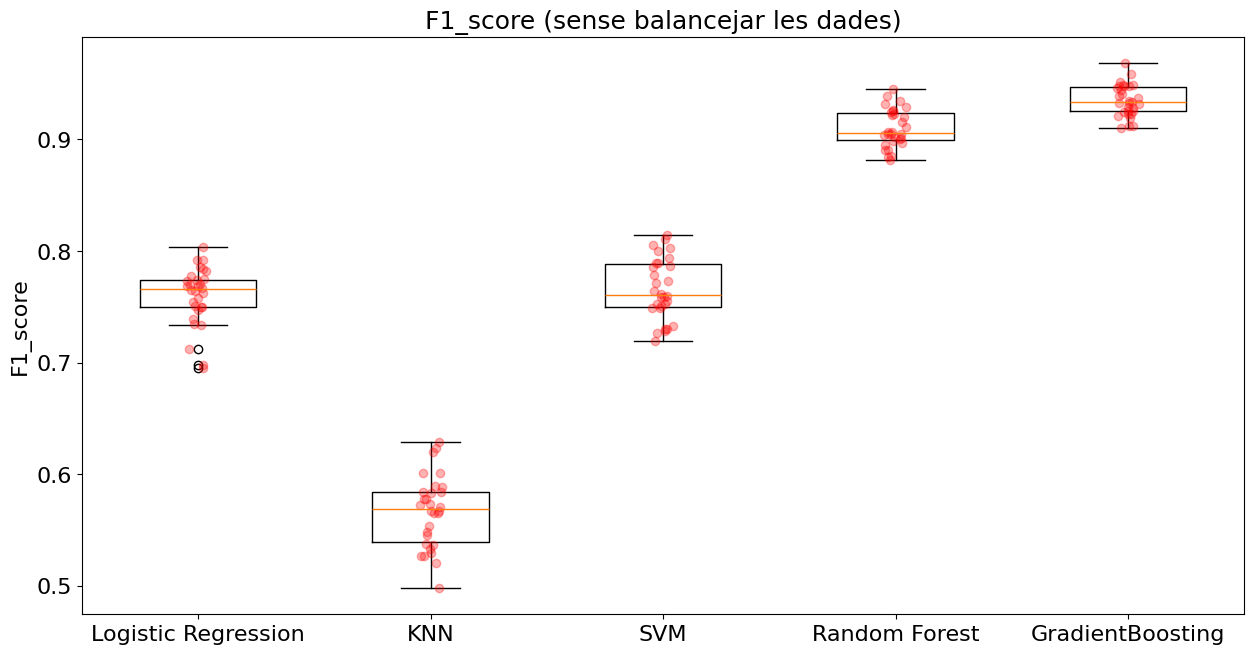

In [31]:
testsize = 0.2
n_proves = 30
f1_r=np.zeros((n_proves,len(models)))
model_names = list(models.keys())

for i in range(n_proves):
    for j, name in enumerate(model_names):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

        model = models[name]
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)

        f1_r[i][j] = f1_score(y_test, y_pred)


plt.figure(figsize=(15,7.5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.boxplot(f1_r)
for i in range(len(models)):
    xderiv = (i+1)*np.ones(f1_r[:,i].shape)+(np.random.rand(n_proves,)-0.5)*0.1
    plt.plot(xderiv,f1_r[:,i],'ro',alpha=0.3)


plt.xticks(range(1, len(model_names) + 1), model_names)
plt.ylabel('F1_score', fontsize=16  )
plt.title('F1_score (sense balancejar les dades)',fontsize=18)


mean_f1 = f1_r.mean(axis=0)
std_f1 = f1_r.std(axis=0)

for name, mean, std in zip(model_names, mean_f1, std_f1):
    print(f"{name:<20} F1: {mean:.3f} ± {std:.3f}")


ROC Curve (AUC-ROC):
	Logistic Regression: 0.8841
	KNN: 0.7850
	SVM: 0.8842
	Random Forest: 0.9519
	GradientBoosting: 0.9547


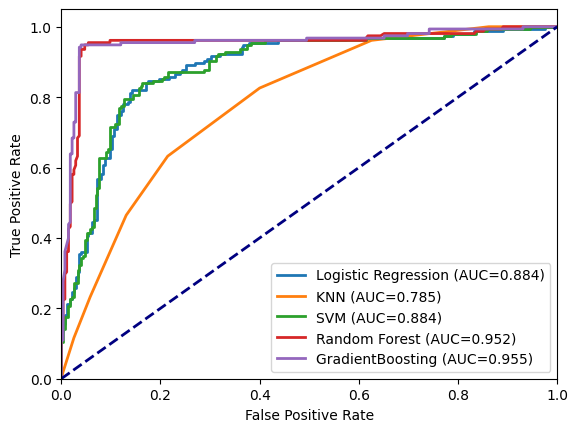

In [17]:
plt.figure()
lw = 2

print(f"ROC Curve (AUC-ROC):")
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]  

    auc_roc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, ths = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_roc:.3f})", lw=lw)
    print(f"\t{name}: {auc_roc:.4f}")


plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

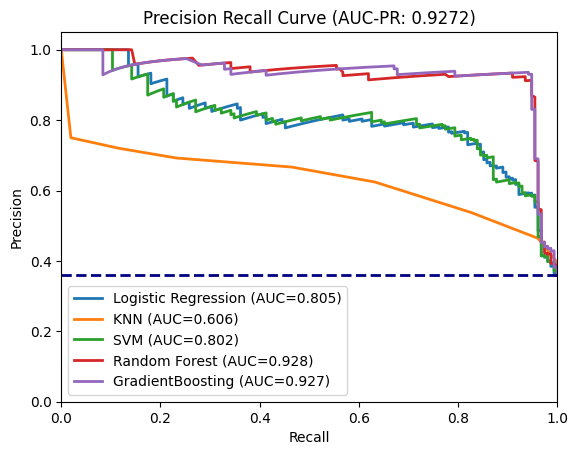

In [18]:
plt.figure()
lw = 2

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]  

    auc_pr = average_precision_score(y_test, y_pred_proba)
    prec, recall, ths = precision_recall_curve(y_test, y_pred_proba)

    plt.plot(recall, prec, label=f"{name} (AUC={auc_pr:.3f})", lw=lw)


prop = np.mean(y_test)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision Recall Curve (AUC-PR: {auc_pr:.4f})")
plt.legend()
plt.show()

In [19]:
# Entrenem el model de Gradient Boosting amb totes les dades
gb_model = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=100,
    max_depth=2,
    learning_rate=0.05
)

gb_model.fit(X, y)

# Importància de les característiques
importances = gb_model.feature_importances_

feature_names = X.columns

# Ordenem les característiques per importància
indices = np.argsort(importances)[::-1]

print("Importància de les variables Gradient Bossting:")
for idx in indices:
    print(f"{feature_names[idx]:<25} {importances[idx]:.4f}")


rf_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None
)

rf_model.fit(X, y)

importances = rf_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

print("\nImportància de les variables Random Forest")
for idx in indices:
    print(f'{feature_names[idx]:<25} {importances[idx]:.4f}')

Importància de les variables Gradient Bossting:
MMSE                      0.2756
FunctionalAssessment      0.2688
ADL                       0.2224
MemoryComplaints          0.1384
BehavioralProblems        0.0935
Age                       0.0007
DietQuality               0.0003
SleepQuality              0.0002
Confusion                 0.0000
DifficultyCompletingTasks 0.0000
CholesterolTriglycerides  0.0000
CholesterolHDL            0.0000
CholesterolLDL            0.0000
PersonalityChanges        0.0000
Disorientation            0.0000
Forgetfulness             0.0000
SystolicBP                0.0000
DiastolicBP               0.0000
CholesterolTotal          0.0000
Hypertension              0.0000
Diabetes                  0.0000
Depression                0.0000
FamilyHistoryAlzheimers   0.0000
HeadInjury                0.0000
CardiovascularDisease     0.0000
PhysicalActivity          0.0000
Smoking                   0.0000
AlcoholConsumption        0.0000
BMI                       0.